In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train/255.
x_test = x_test/255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

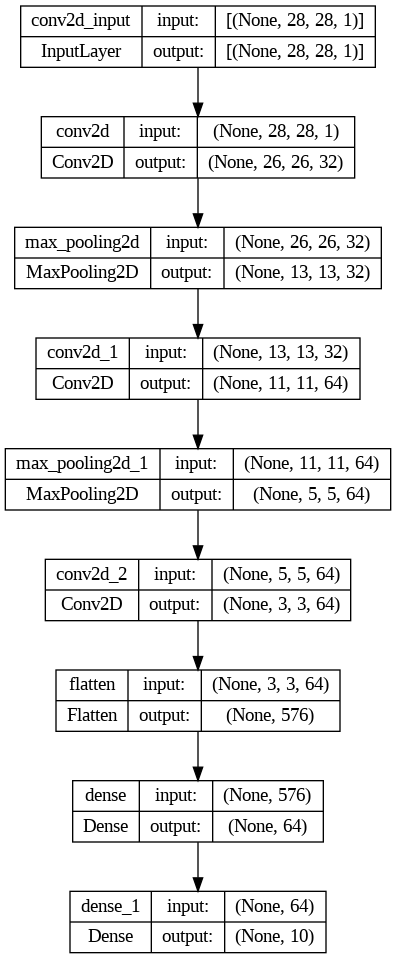

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)

(3, 3, 1, 32) (32,)
[[-0.08849992 -0.03332064 -0.0708504 ]
 [ 0.06318271  0.03879501 -0.0280188 ]
 [ 0.02056782  0.01526168 -0.05027624]]


In [6]:
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0340 - accuracy: 0.9894
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0309 - accuracy: 0.9906
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0202 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.017

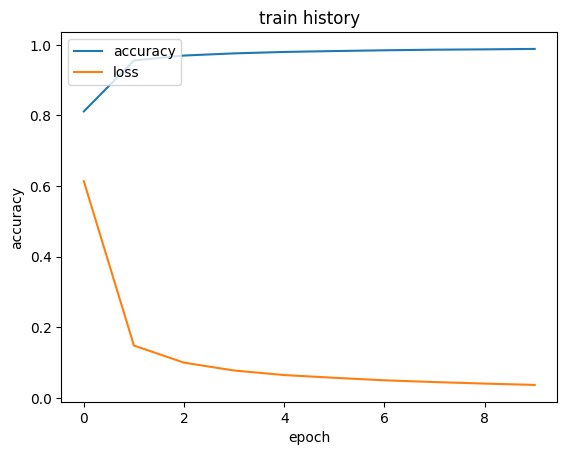

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9883


In [ ]:
preds = model.predict(x_train[0:1])
print(preds[0])
print(preds[0].sum())

1/1 [==============================] - 0s 191ms/step
[2.4624935e-10 1.5451523e-08 1.5698792e-09 4.4187091e-02 4.9709188e-11
 9.5580888e-01 1.3885264e-10 5.0227342e-08 1.8714084e-07 3.7800407e-06]
1.0


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6436 - accuracy: 0.8376
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3407 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2930 - accuracy: 0.9185
Epoch 

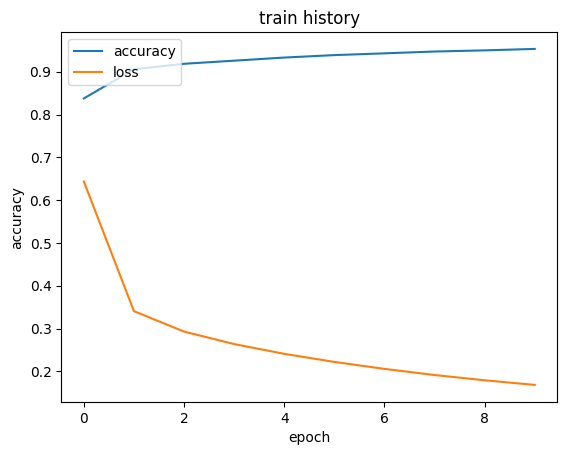

313/313 [==============================] - 1s 3ms/step - loss: 0.1625 - accuracy: 0.9531


In [ ]:
modelfc = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelfc.summary()
modelfc.compile(optimizer = 'sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = modelfc.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

loss, accuracy = modelfc.evaluate(x_test, y_test)

out[0].shape = (2, 26, 26, 32)
model result shape (with channel) =  (26, 26, 1)
(26, 26)


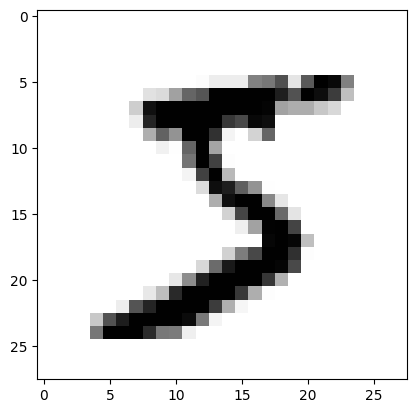

[[0.         0.         0.01176471]
 [0.36862745 0.60392157 0.66666667]
 [0.99215686 0.99215686 0.99215686]]


In [ ]:
from tensorflow.keras import backend as K

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp, keras.Input(shape=())], [out]) for out in outputs]

layer_id = 0
filter_id = 0
layerfn = functors[layer_id]
learning_phase = 0
out = layerfn([x_train[0:2], learning_phase])

print('out[0].shape =', out[0].shape)
result = out[0][0][:,:,filter_id:filter_id+1]

print('model result shape (with channel) = ', result.shape)

result_as_img = result.reshape((result.shape[0], result.shape[1]))
print(result_as_img.shape)

plt.imshow(x_train[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
x_pos = 10
y_pos = 5
img3x3 = x_train[0][y_pos:y_pos+3, x_pos:x_pos+3, :].reshape((3,3))
print(img3x3)

In [ ]:
conv2d_l = model.layers[0]
weights = conv2d_l.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)
bias = b[0]
print(bias)
print(img3x3)

(3, 3, 1, 32) (32,)
[[ 0.02224104 -0.08474363  0.11246762]
 [ 0.05246447 -0.01484762  0.16064654]
 [ 0.2261527   0.17758642  0.16519792]]
-0.000105999876
[[0.         0.         0.01176471]
 [0.36862745 0.60392157 0.66666667]
 [0.99215686 0.99215686 0.99215686]]


In [ ]:
y = (kernel*img3x3).sum()+bias
if y < 0:
  y = 0
print(y)
print(result[y_pos][x_pos])

0.683162682907035
[0.68316275]
